# SPRING Parsing Results
The following results were obtained by parsing AMRs from the QALD-9-Plus dataset using SapienzaNLP's [SPRING](https://github.com/SapienzaNLP/spring/blob/main/README.md) AMR 3.0 checkpoint.

In [ ]:
%%capture
!pip install language_data

In [16]:
import pandas as pd
import langcodes
import language_data
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/michael-regan/massive-amr-shared/main/notebooks/data/QALD9-SPRING.csv?token=GHSAT0AAAAAACBXW3EPKJJOPIVGLJGV5Y2OZCNN52Q"
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,sentence,language,set,gold_amr,parsed_amr,smatch
0,0,List all boardgames by GMT.,en,train,# ::snt List all boardgames by GMT.\n(l / list...,# ::snt List all boardgames by GMT.\n(l / list...,0.37
1,1,Listez tous les jeux de société de GMT.,fr,train,# ::snt Listez tous les jeux de société de GMT...,# ::snt Liste die Brettspiele von GMT auf.\n(l...,0.43
2,2,Liste die Brettspiele von GMT auf.,de,train,# ::snt Liste die Brettspiele von GMT auf.\n(l...,# ::snt Zeige mir alle Brettspiele von GMT.\n(...,0.25
3,3,Zeige mir alle Brettspiele von GMT.,de,train,# ::snt Zeige mir alle Brettspiele von GMT.\n(...,# ::snt Išvardinkite visus stalo žaidimus paga...,0.16
4,4,Перечислите все игры GMT.,ru,train,# ::snt Перечислите все игры GMT.\n(l / list-0...,# ::snt Išvardykite visus GMT žaidimus.\n(l / ...,0.11


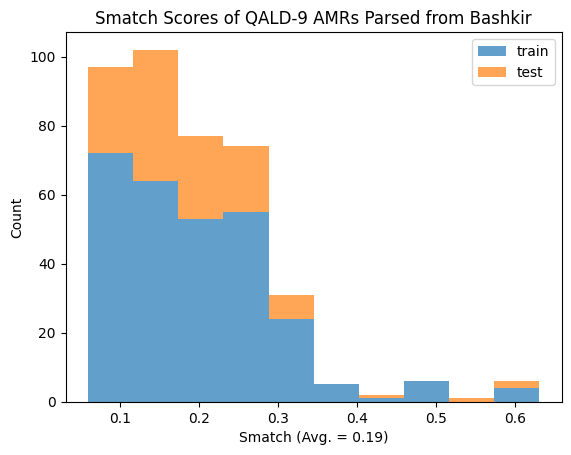

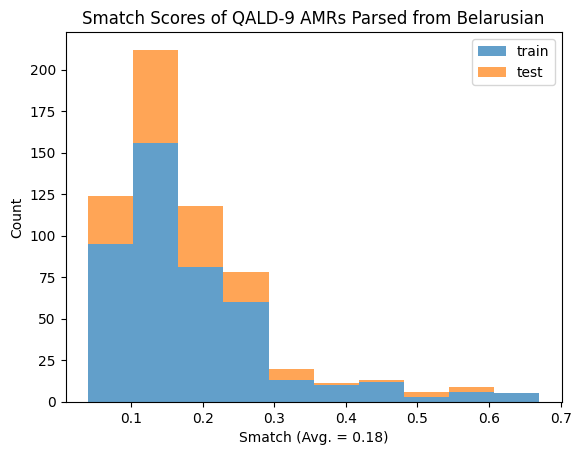

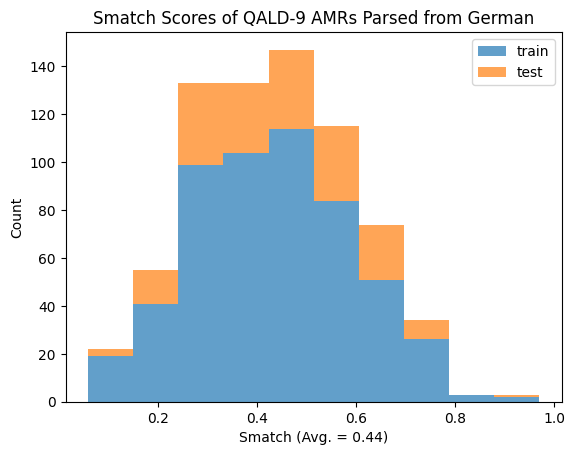

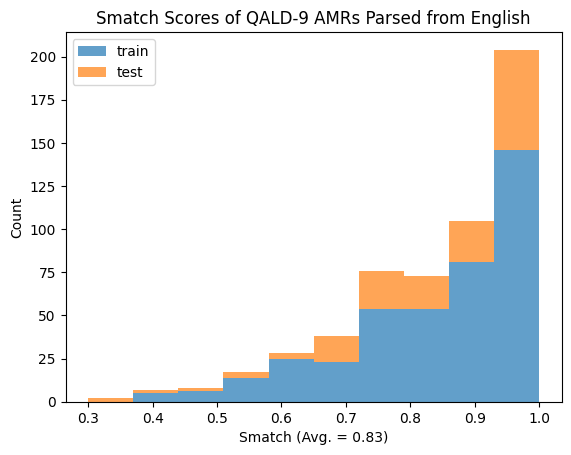

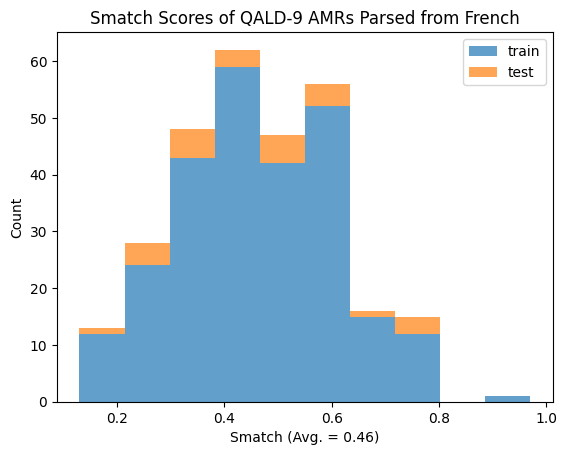

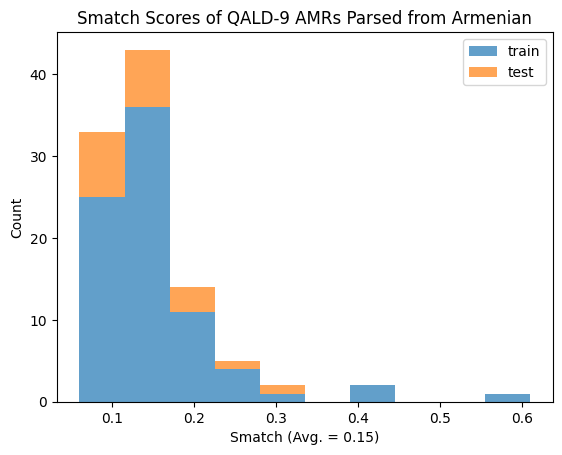

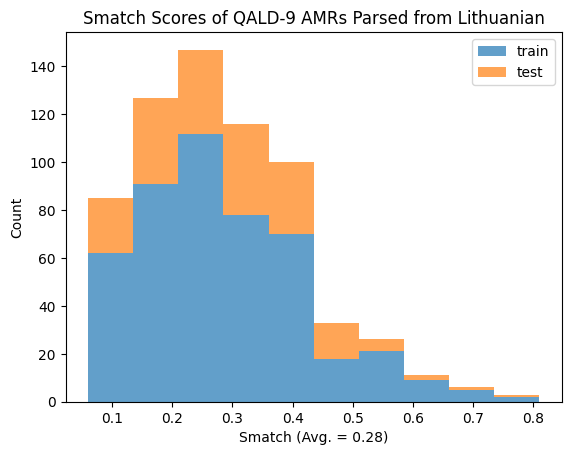

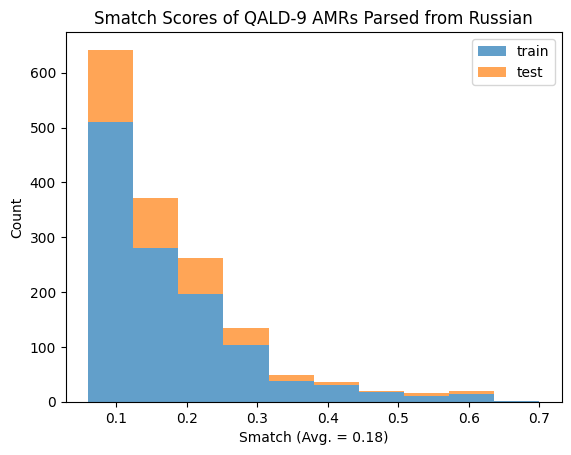

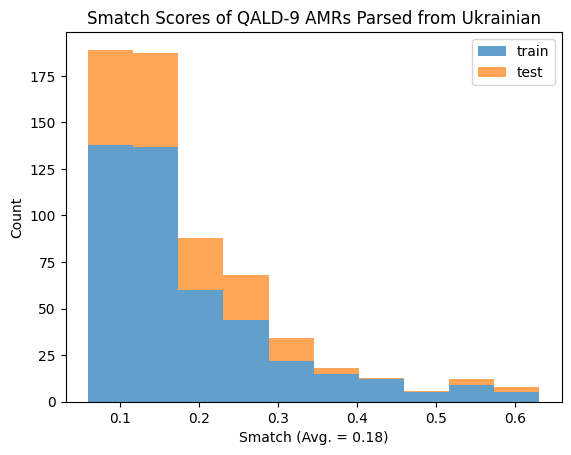

In [18]:
# group DataFrame by language column and calculate mean of smatch column for each group
language_groups = df.groupby('language')['smatch'].mean()

# iterate over each language and plot histogram
for language in language_groups.index:
    lang_df = df[df['language'] == language]
    train_smatch = lang_df[lang_df['set']=='train']['smatch']
    test_smatch = lang_df[lang_df['set']=='test']['smatch']
    
    # map language code to name in the title
    language_name = langcodes.Language(language).language_name()
    plt.title(f'Smatch Scores of QALD-9 AMRs Parsed from {language_name}')

    # calculate average smatch score for the current language
    lang_mean_smatch = language_groups[language]
    
    # set axis labels and xlabel to include the average smatch score
    plt.xlabel(f'Smatch (Avg. = {lang_mean_smatch:.2f})')
    plt.ylabel('Count')
    
    plt.hist([train_smatch, test_smatch], bins=10, alpha=0.7, label=['train', 'test'], stacked=True)

    # add legend
    plt.legend()

    # show plot
    plt.show()